In [7]:
from sklearn import datasets
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
data = pd.read_csv('c:/Users/MANOLO/Downloads/usuarios_win_mac_lin.csv')

In [9]:
data.head()

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2


In [4]:
data.describe()

,duracion,paginas,acciones,valor,clase
count,170.000000,170.000000,170.000000,170.000000,170.000000
mean,111.075729,2.041176,8.723529,32.676471,0.752941
std,202.453200,1.500911,9.136054,44.751993,0.841327
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,11.000000,1.000000,3.000000,8.000000,0.000000
50%,13.000000,2.000000,6.000000,20.000000,0.000000
75%,108.000000,2.000000,10.000000,36.000000,2.000000
max,898.000000,9.000000,63.000000,378.000000,2.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duracion  170 non-null    float64
 1   paginas   170 non-null    int64  
 2   acciones  170 non-null    int64  
 3   valor     170 non-null    int64  
 4   clase     170 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 6.8 KB


In [10]:
data['clase'].groupby

<bound method Series.groupby of 0      2
1      2
2      2
3      2
4      2
      ..
165    0
166    0
167    0
168    0
169    0
Name: clase, Length: 170, dtype: int64>

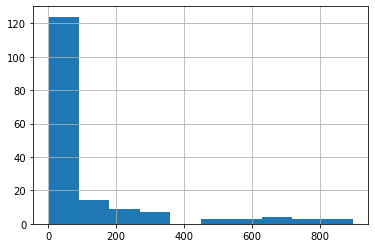

In [15]:
data['duracion'].hist()

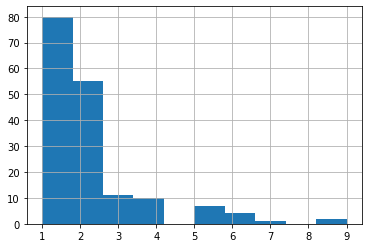

In [16]:
data['paginas'].hist()

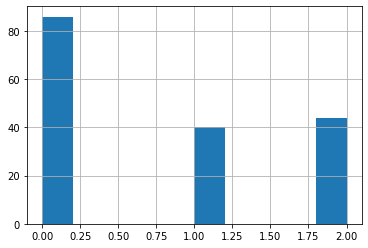

In [17]:
data['clase'].hist()

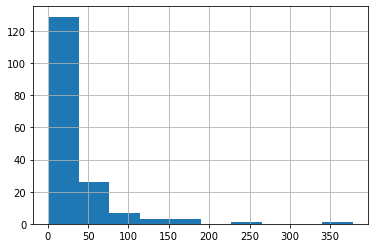

In [18]:
data['valor'].hist()

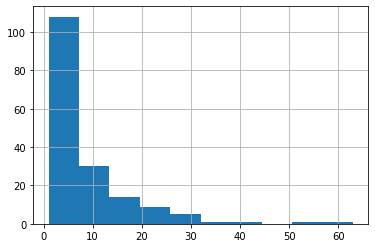

In [19]:
data['acciones'].hist()

In [30]:
data.corr()

,duracion,paginas,acciones,valor,clase
duracion,1.000000,0.277550,0.163028,0.090869,0.128706
paginas,0.277550,1.000000,0.724061,0.583910,-0.052813
acciones,0.163028,0.724061,1.000000,0.862961,-0.329954
valor,0.090869,0.583910,0.862961,1.000000,-0.322737
clase,0.128706,-0.052813,-0.329954,-0.322737,1.000000


In [20]:
x = data.iloc[:, :-1] 
y = data.iloc[:, 4:5]

In [48]:
from sklearn.linear_model import LogisticRegression
clasfi1 = LogisticRegression(random_state = 0)
clasfi1.fit(x,y)

C:\Users\MANOLO\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\MANOLO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [50]:
y_predic1 = clasfi1.predict(x)
clasfi1.score(x,y)

0.7823529411764706

In [25]:
# Divida el dataset en dos conjuntos uno de entrenamiento y otro de prueba
# con conjunto de prueba y entrenamiento
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
type(x_train)

pandas.core.frame.DataFrame

In [26]:
from sklearn.linear_model import LogisticRegression
clasfi = LogisticRegression(random_state = 0)
clasfi.fit(x_train,y_train)

C:\Users\MANOLO\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\MANOLO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [27]:
y_predic = clasfi.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predic)

In [29]:
cm

array([[14,  0,  2],
       [ 7,  3,  0],
       [ 0,  0,  8]], dtype=int64)

In [ ]:
clasfi.score(x_test,y_test)

In [51]:
# Realice una validación cruzada con cv=10
# muestre los score, utilice como métrica a R2
scores=cross_val_score(clasfi, x, y, cv=10, scoring="r2")
scores

C:\Users\MANOLO\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\MANOLO\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MANOLO\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


array([ 0.67924528,  0.19811321,  0.43867925,  0.67924528, -0.04081633,
        0.82653061,  0.82653061, -0.04081633,  0.30612245,  0.39285714])

In [52]:
scores.mean()

0.426569118213323

In [53]:
from sklearn.metrics import recall_score, accuracy_score, precision_score, f1_score
# samples  los promedio
# weighted cantidad de instacnia  y mayor peso tiene
recall_score(y_test,y_predic,average ='weighted')

0.7352941176470589

In [46]:
precision_score(y_test,y_predic,average ='weighted')

0.7960784313725489

In [47]:
f1_score(y_test,y_predic,average ='weighted')

0.7010177598412892

In [36]:
accuracy_score(y_test,y_predic)

0.7352941176470589

In [37]:
clasfi.predict([[10,3,5,9]])

array([2], dtype=int64)